# Ford Gobike Data Exploration 

## Investigation Overview

In this dataset, I look forward to analyze the characteristics of how time,gender and days would affect the no. of users and no. of trips.

## Dataset Overview
Ford GoBike is a regional public bike sharing system in Bay Area.It started in the year 2013 and has been successfull all over these years.
The most important thing is that the bikes are available 24/7 on all the days irrespective of what day it is.There are two types of users, subscribers and general customers.

In [1]:
#Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from os import path, getcwd, makedirs, listdir

%matplotlib inline

## 1 .Gathering Data

The dataset was downloaded from <a href= "https://s3.amazonaws.com/fordgobike-data/201902-fordgobike-tripdata.csv.zip">here</a>

In [2]:
#Download and read the csv file
df = pd.read_csv("201902-fordgobike-tripdata.csv")

In [3]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
df.shape

(183412, 16)

## 2. Assessing Data

In [5]:
# Visualize sample of dataset
df.sample(20)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
47772,374,2019-02-22 08:32:05.0940,2019-02-22 08:38:19.7860,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,5351,Subscriber,1971.0,Male,No
78573,214,2019-02-18 19:15:17.9410,2019-02-18 19:18:52.8860,200.0,2nd Ave at E 18th St,37.800214,-122.253810,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,6368,Subscriber,1995.0,Male,No
39293,1222,2019-02-23 09:29:47.2700,2019-02-23 09:50:10.0600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,84.0,Duboce Park,37.769201,-122.433812,5572,Subscriber,1986.0,Male,No
89113,2595,2019-02-16 15:47:31.7270,2019-02-16 16:30:46.9230,323.0,Broadway at Kearny,37.798014,-122.405950,371.0,Lombard St at Columbus Ave,37.802746,-122.413579,5239,Subscriber,1992.0,Female,No
29281,706,2019-02-25 07:35:04.9950,2019-02-25 07:46:51.2490,114.0,Rhode Island St at 17th St,37.764478,-122.402570,16.0,Steuart St at Market St,37.794130,-122.394430,4633,Subscriber,1973.0,Male,No
178304,370,2019-02-01 17:27:33.2390,2019-02-01 17:33:44.1650,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,345.0,Hubbell St at 16th St,37.766483,-122.398279,5001,Subscriber,1994.0,Male,No
4570,144,2019-02-28 15:40:26.3500,2019-02-28 15:42:50.8680,61.0,Howard St at 8th St,37.776513,-122.411306,350.0,8th St at Brannan St,37.771431,-122.405787,4619,Subscriber,1990.0,Female,No
182227,644,2019-02-01 08:25:54.1000,2019-02-01 08:36:38.9120,22.0,Howard St at Beale St,37.789756,-122.394643,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,1024,Subscriber,1989.0,Male,Yes
20815,346,2019-02-26 10:32:16.7600,2019-02-26 10:38:03.5690,126.0,Esprit Park,37.761634,-122.390648,81.0,Berry St at 4th St,37.775880,-122.393170,6525,Subscriber,1986.0,Male,No
5979,735,2019-02-28 11:31:02.6370,2019-02-28 11:43:18.5750,278.0,The Alameda at Bush St,37.331932,-121.904888,317.0,San Salvador St at 9th St,37.333955,-121.877349,2611,Subscriber,1993.0,Male,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [7]:
# Check for duplicates
df.duplicated().sum()

0

In [8]:
#Describing the data
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


## 3. Cleaning Data

In [9]:
#Make a copy of the original dataset
df_clean = df.copy()

In [10]:
df_clean.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

 **Define** : Change the datatypes of required columns.

**Code**

In [11]:
#Change datatypes of start_time and end_time to datetime
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])

In [12]:
# Change datatype of gender,user_type to category
df_clean['user_type'] = df_clean['user_type'].astype('category')
df_clean['member_gender'] = df_clean['member_gender'].astype('category')

In [13]:
# Change datatypes of bike id, start_station_id, end_station_id to object
df_clean['start_station_id'] = df_clean['start_station_id'].astype(str)
df_clean['end_station_id'] = df_clean['end_station_id'].astype(str)
df_clean['bike_id'] = df_clean['bike_id'].astype(str)

**Test**

In [14]:
df_clean.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                        category
member_birth_year                 float64
member_gender                    category
bike_share_for_all_trip            object
dtype: object

**Define:** Create columns for start_time month,weekday,day and hour 

**Code**

In [15]:
# Extract Month
df_clean['start_month'] = df_clean.start_time.dt.strftime('%B')

In [16]:
# Extract Weekday
df_clean['start_week']=df_clean.start_time.dt.strftime('%a')

In [17]:
# Extract Start time Date
df_clean['start_day']=df_clean.start_time.dt.day.astype(int)

In [18]:
# Extract the hour 
df_clean['start_hour']=df_clean.start_time.dt.hour

**Test**

In [19]:
df_clean.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_month,start_week,start_day,start_hour
151656,1122,2019-02-06 16:54:19.649,2019-02-06 17:13:02.482,343.0,Bryant St at 2nd St,37.783172,-122.393572,119.0,18th St at Noe St,37.761047,-122.432642,4602,Subscriber,1980.0,Male,No,February,Wed,6,16
49408,411,2019-02-21 21:48:18.869,2019-02-21 21:55:10.168,88.0,11th St at Bryant St,37.770030,-122.411726,58.0,Market St at 10th St,37.776619,-122.417385,1469,Subscriber,1983.0,Male,No,February,Thu,21,21
61375,1350,2019-02-20 17:31:27.477,2019-02-20 17:53:58.309,130.0,22nd St Caltrain Station,37.757288,-122.392051,16.0,Steuart St at Market St,37.794130,-122.394430,1846,Customer,1984.0,Male,No,February,Wed,20,17
177780,315,2019-02-01 19:10:40.447,2019-02-01 19:15:55.981,196.0,Grand Ave at Perkins St,37.808894,-122.256460,180.0,Telegraph Ave at 23rd St,37.812678,-122.268773,5514,Subscriber,1978.0,Male,No,February,Fri,1,19
122759,82,2019-02-11 10:48:00.050,2019-02-11 10:49:22.210,132.0,24th St at Chattanooga St,37.751819,-122.426614,134.0,Valencia St at 24th St,37.752428,-122.420628,2168,Subscriber,1990.0,Male,Yes,February,Mon,11,10
65411,452,2019-02-20 09:40:18.290,2019-02-20 09:47:51.278,336.0,Potrero Ave and Mariposa St,37.763281,-122.407377,80.0,Townsend St at 5th St,37.775235,-122.397437,3211,Customer,1985.0,Male,No,February,Wed,20,9
145702,425,2019-02-07 09:21:13.282,2019-02-07 09:28:18.772,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,4877,Subscriber,1996.0,Male,No,February,Thu,7,9
138056,271,2019-02-08 08:08:39.014,2019-02-08 08:13:10.244,364.0,China Basin St at 3rd St,37.772000,-122.389970,64.0,5th St at Brannan St,37.776754,-122.399018,5223,Subscriber,1981.0,Male,No,February,Fri,8,8
45780,421,2019-02-22 11:21:02.187,2019-02-22 11:28:03.542,47.0,4th St at Harrison St,37.780955,-122.399749,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,5398,Subscriber,1979.0,Male,No,February,Fri,22,11
150563,281,2019-02-06 18:06:15.106,2019-02-06 18:10:56.384,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,89.0,Division St at Potrero Ave,37.769218,-122.407646,5565,Subscriber,1975.0,Male,No,February,Wed,6,18


**Define:** 
Calculate Age for better analysis

**Code**

In [20]:
#Calculation of age based on birth year
df_clean['user_age'] = 2020 - df_clean['member_birth_year']

**Test**

In [21]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_month,start_week,start_day,start_hour,user_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,No,February,Thu,28,17,36.0
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,2535,Customer,NaN,NaN,No,February,Thu,28,18,NaN
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,No,February,Thu,28,12,48.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989.0,Other,No,February,Thu,28,17,31.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,Yes,February,Thu,28,23,46.0


In [22]:
df_clean.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,start_day,start_hour,user_age
count,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000,175147.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,37.771223,-122.352664,37.771427,-122.352250,1984.806437,15.298977,13.458421,35.193563
std,1794.389780,0.099581,0.117097,0.099490,0.116673,10.116689,8.028187,4.724978,10.116689
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1878.000000,1.000000,0.000000,19.000000
25%,325.000000,37.770083,-122.412408,37.770407,-122.411726,1980.000000,8.000000,9.000000,28.000000
50%,514.000000,37.780760,-122.398285,37.781010,-122.398279,1987.000000,15.000000,14.000000,33.000000
75%,796.000000,37.797280,-122.286533,37.797320,-122.288045,1992.000000,22.000000,17.000000,40.000000
max,85444.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000,28.000000,23.000000,142.000000


In [23]:
df_clean.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id                0
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
start_month                   0
start_week                    0
start_day                     0
start_hour                    0
user_age                   8265
dtype: int64

There are a lot of null values for categorical data and it would be better to remove this data as it can make a huge impact on the analysis as the no. of null values is huge

In [24]:
#Remove NaN values
df_clean.dropna(inplace=True)

In [25]:
df_clean.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
start_month                0
start_week                 0
start_day                  0
start_hour                 0
user_age                   0
dtype: int64

In [26]:
#View the shape ofthe dataset
df_clean.shape

(174952, 21)

In [27]:
#Save cleaned data
df_clean.to_csv('master_file.csv',index=False)

### What is the structure of your dataset?
There were around 183412 rows out of which 8265 were observed to be NaN values. After cleaning, the dataset has 174952 observations. 

There were 16 columns before cleaning, I have added few more columns for better analysis.After cleaning, the dataset consists 27 columns.
The columns involved in the dataset are 'duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'start_time_month_name', 'start_time_month', 'start_time_weekday',
       'start_time_day', 'start_time_hour', 'member_age', 'start_month',
       'start_week', 'start_day', 'start_hour', 'user_age'

### What is/are the main feature(s) of interest in your dataset?
The main features in this dataset seems to be the duration , start time,user type,gender which could be analyzed to answer most of the questions. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
According to me, I think that the start time and start weekday would make the analysis better and also considering the user_type and how do all the features vary according to the user_type.

## 4. Univariate Exploration 

It is a good way to start the weekly , hourly and the trip duration analysis for this dataset

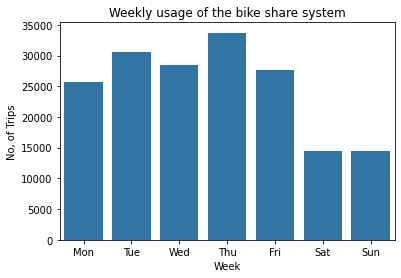

In [28]:
#Weekly usage of the bike sharing system
base_color = sns.color_palette()[0]
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sns.countplot(data=df_clean,x='start_week',color=base_color,order=weekday)
g.set(xlabel = "Week",ylabel = "No, of Trips")
plt.title('Weekly usage of the bike share system');

Thursday is observed to have the maximum usage of bike share system.But, the most important observation to be noted is that weekends have a low usage of bike share system which could have been because of non-working day for school/work.

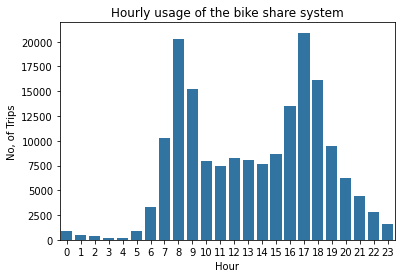

In [29]:
#Hourly usage of the bike share system
g = sns.countplot(data=df_clean, x='start_hour', color = base_color)
g.set(xlabel = "Hour",ylabel = "No, of Trips")
plt.title('Hourly usage of the bike share system');

There has been a huge amount of users starting  at 8am - 9am and 6pm to 7pm. This is beacause most of the people tend to go to work and get back to home at these times. 

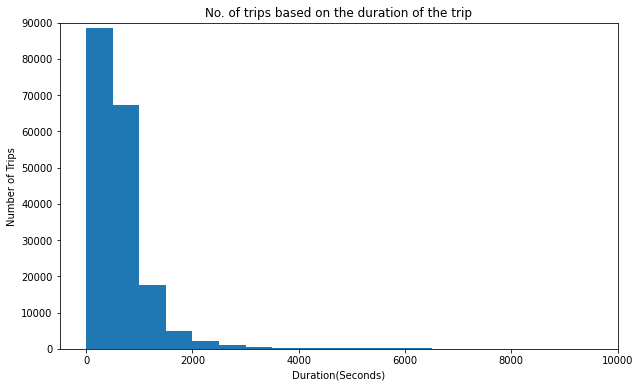

In [30]:
#Duration of trip 
bins = np.arange(0, df['duration_sec'].max()+500, 500)

plt.figure(figsize=[10, 6])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.title('No. of trips based on the duration of the trip')
plt.xlabel('Duration(Seconds)')
plt.ylabel('Number of Trips')
plt.axis([-500, 10000, 0, 90000])
plt.show()

This graph does not seem convincing.Let us convert it to log scale

/home/abhishek/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  # Remove the CWD from sys.path while we load stuff.


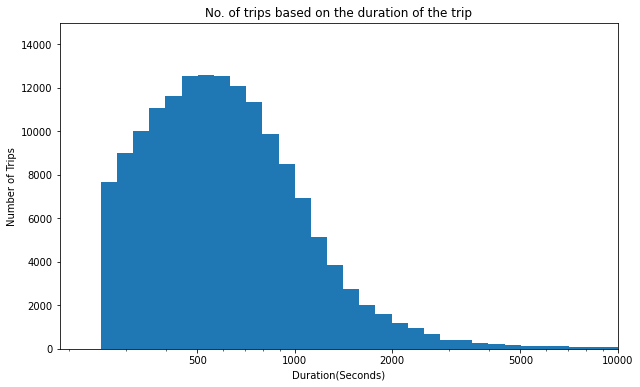

In [31]:
bins_log = 10 ** np.arange(2.4, np.log10(df['duration_sec'].max()) + 0.05, 0.05)

plt.figure(figsize=[10, 6])
plt.hist(data = df, x = 'duration_sec', bins = bins_log)
plt.title('No. of trips based on the duration of the trip')
plt.xlabel('Duration(Seconds)')
plt.ylabel('Number of Trips')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4], [500, 1000,2000,5000,10000])
plt.axis([0, 10000, 0, 15000])
plt.show()

Trip duration is mostly centered on values which are less than 1800 seconds(30 mins) with peak around 600 seconds(10 mins). Number of Trips values first increases starting from around 8000 values to 12500 values at around 600 seconds but then starts to fall below at 2000 values under 2000 seconds.

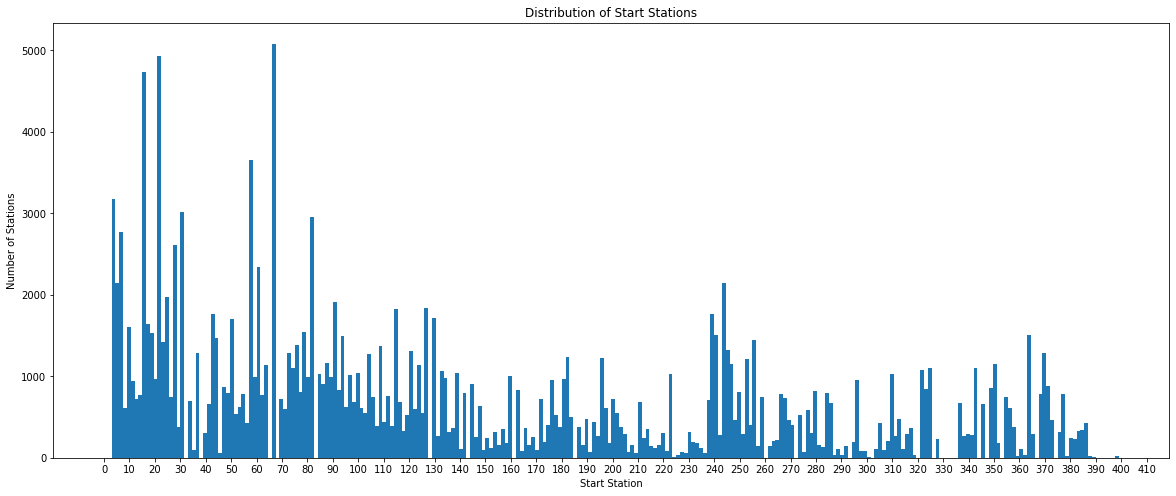

In [41]:
# Starting station plot
bins = np.arange(0, df['start_station_id'].astype(float).max()+1.5, 1.5)

plt.figure(figsize=[20, 8])
plt.xticks(range(0, 500, 10))
plt.hist(data = df.dropna(), x = 'start_station_id', bins = bins)
plt.title('Distribution of Start Stations')
plt.xlabel('Start Station')
plt.ylabel('Number of Stations')
plt.show()

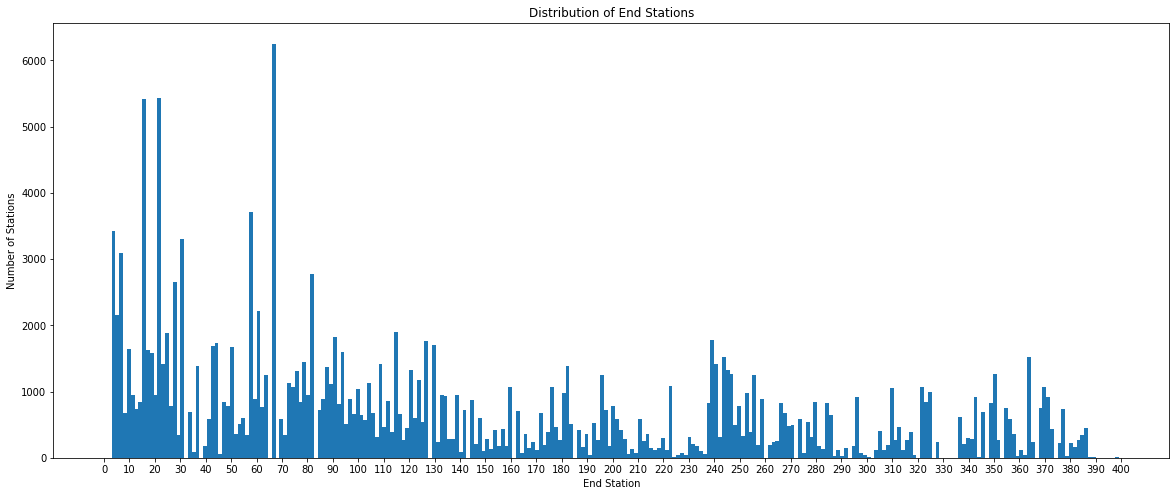

In [44]:
# Ending station plot
bins = np.arange(0, df['end_station_id'].astype(float).max()+1.5, 1.5)

plt.figure(figsize=[20, 8])
plt.xticks(range(0, 402, 10))
plt.hist(data = df.dropna(), x = 'end_station_id', bins = bins)
plt.title('Distribution of End Stations')
plt.xlabel('End Station')
plt.ylabel('Number of Stations')
plt.show()


In the case of start and end station, as you can see, the start stations and end stations are same.

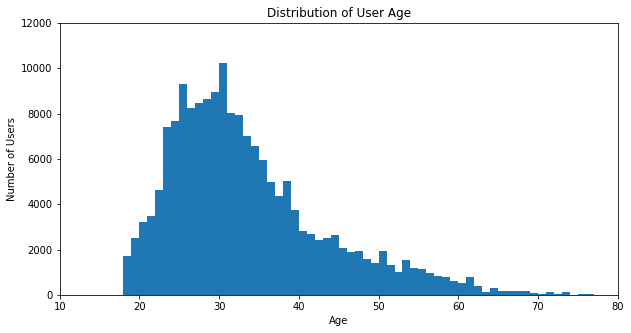

In [40]:
# No. of users by comparing with the age
bins = np.arange(0, df['member_birth_year'].astype(float).max()+1, 1)

plt.figure(figsize=[10, 5])
plt.hist(data = df.dropna(), x = 'member_birth_year', bins = bins)
plt.axis([1939, 2009, 0, 12000])
plt.xticks([1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009], [(2019-1939), (2019-1949), (2019-1959), (2019-1969), (2019-1979), (2019-1989), (2019-1999), (2019-2009)])
plt.gca().invert_xaxis()
plt.title('Distribution of User Age')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()


In the case of age, you can see that the distribution is more concentrated between 20 to 40 years old.

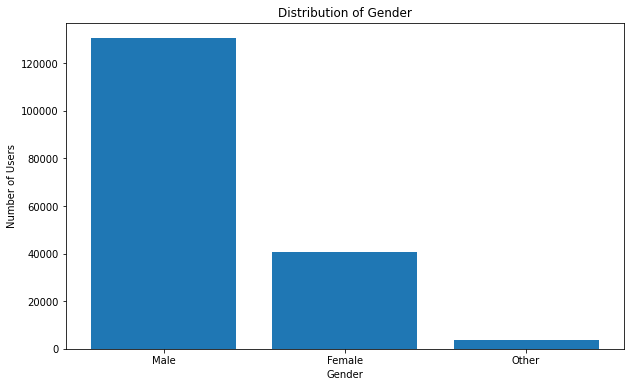

In [46]:
# Plot No. of users compared with genders
plt.figure(figsize=[10,6])
plt.bar(x = df_clean.member_gender.value_counts().keys(), height = df_clean.member_gender.value_counts() )
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.show()

Male have been dominating in this aspect to use share bike

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?<br>
The trip duration is concentrated near 600secs(10 mins) and then slowly decreases with an increase of duration

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

When investigating the Birth year variables, Birth year is converted by substracting the year from current year in order to give the distibution for age to have  a better analysis. In addtion, start station and end station have been plotted in a larger plot so that it gives a better understanding of the plot for analysing.

## 5. Bivariate Exploration

**Analysis based on User Type**

In [47]:
# Calculation of % split for the user type
customer = df_clean.query('user_type == "Customer"')['bike_id'].shape[0]
subscriber = df_clean.query('user_type == "Subscriber"')['bike_id'].shape[0]

customer_proportion = customer / df_clean['bike_id'].shape[0]
subscriber_proportion = subscriber / df_clean['bike_id'].shape[0]

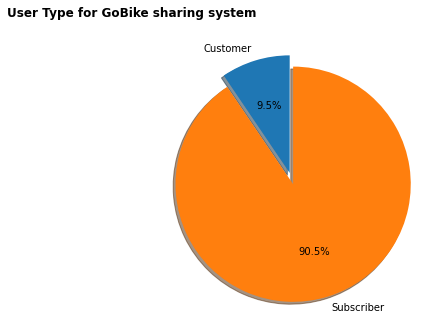

In [57]:
plt.figure(figsize = [10, 5])

# Pie Chart for User Type
plt.subplot(1, 2, 2)

labels = ['Customer', 'Subscriber']
sizes = [customer_proportion, subscriber_proportion]
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, 
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')

plt.suptitle('User Type for GoBike sharing system',fontweight='bold');

This clearly shows that there are huge number of subscribers when compared to customers who use bike share service.

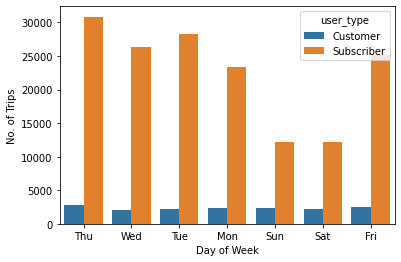

In [99]:
# Weekly usage of the bike sharing system per user type
sns.countplot(data=df_clean, x='start_week', hue='user_type');
plt.xlabel('Day of Week');
plt.ylabel('No. of Trips');

The graph shows that there is a difference in No. of trips for different user types.For Customers, as they may travel ocassionally and would use bikes on holidays.But when it comes to the subcribers, they use this daily to go to work/school and would not use it during weekends as there would be holidays.

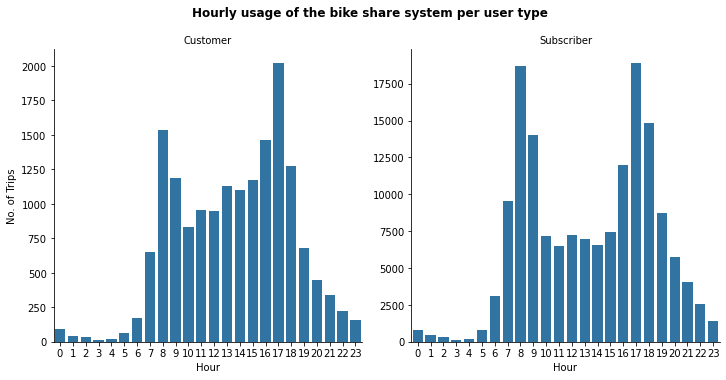

In [97]:
# Hourly usege of the bike sharing system per user type
g = sns.catplot(data=df_clean, x='start_hour', col="user_type", kind='count', sharey = False,
            color = base_color)
g.set_axis_labels("Hour", "No. of Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Hourly usage of the bike share system per user type', y=1.05, fontweight='bold');

From the above graph, we can say that subscribers travel from 8-9am frequently as the work/school would start and would come back at 5-6pm. But for the customers , they seem to travel in between 8am - 6pm randomly.

/home/abhishek/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


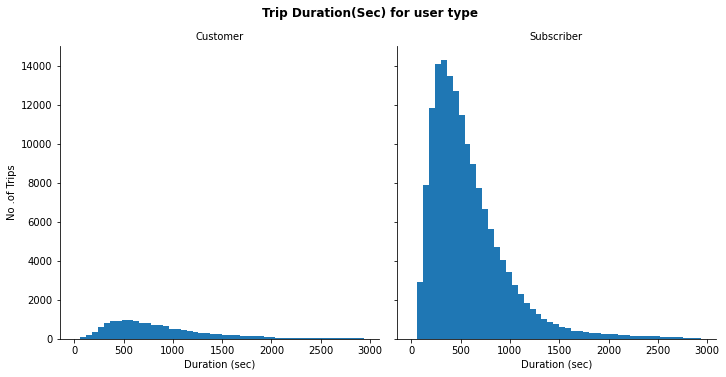

In [77]:
# Histogram for Duration(Sec) for User Types
g = sns.FacetGrid(df_clean, col="user_type", margin_titles=True, size=5)
bin_edges = np.arange(0, 3000,60)
g.map(plt.hist, "duration_sec", color=base_color, bins=bin_edges)
g.set_axis_labels("Duration (sec)", "No .of Trips")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('Trip Duration(Sec) for user type', y=1.04,fontweight='bold');

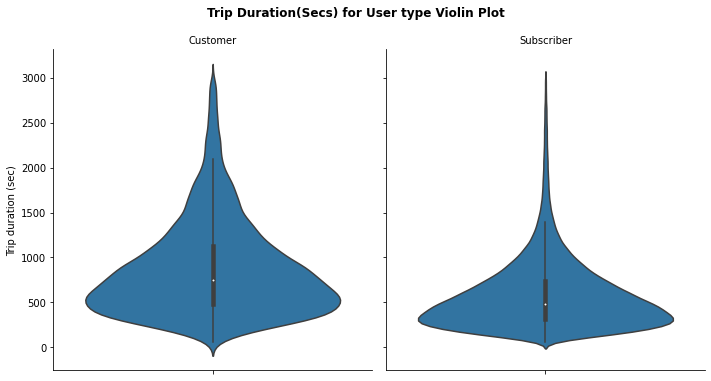

In [92]:
# Violin Plot for Duration for User Type
data = df_clean.query('duration_sec < 3000')
g = sns.catplot(data=data, y='duration_sec', col="user_type", kind='violin',
            color = base_color)
g.set_titles(col_template = '{col_name}')
g.set_axis_labels("", "Trip duration (sec)")
g.fig.suptitle('Trip Duration(Secs) for User type Violin Plot', y=1.05, fontweight='bold');


From the above viloinplots, we can see that the trip durations are longer for customers when compared to subscribers.The reason for it would be that the work place would have been near to their home.The customers travel randomly to various places and would have had longer trip duration

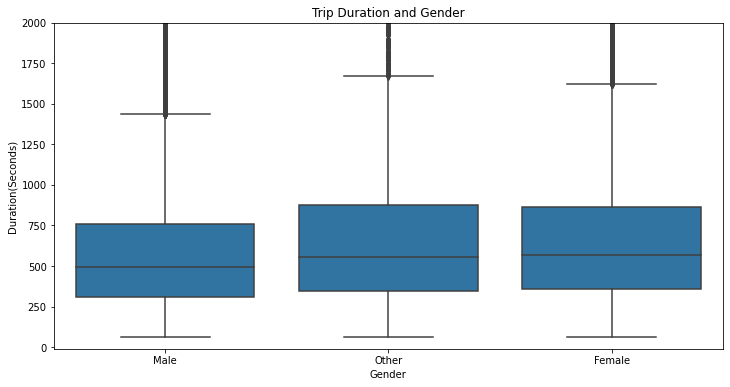

In [84]:
#Duration of Trip for various genders
plt.figure(figsize = [12, 6])
base_color = sns.color_palette()[0]
sns.boxplot(data = df, x = 'member_gender', y = 'duration_sec', color = base_color)
plt.ylim([-10, 2000])
plt.title('Trip Duration and Gender')
plt.xlabel('Gender')
plt.ylabel('Duration(Seconds)')
plt.show()

Interestingly, we can see that higher percentage of female and other rides longer trips then males although number of male riders are very high then other and female.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
Comparing the user type to the analysis depicted different usage behaviours between customers and subscribers. From the above analysis, customers are casual riders, most probably tourists who rent bikes more often during weekends than weekdays and they rent bikes more often within the day rather than around commute hours (8-9am and 5-6pm). Subscribers use this service daily. They rent bikes more often during weekdays than weekends and mainly around the time they go and go back from work or school (8-9am and 5-6pm).

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
It is observed that there is a difference in trip duration for different user type. Customers trips are usually longer than for subscribers, most probably due to the fact they prefer bike rides around weekend. Subscribers on the other hand use the system mainly to go to work and rarely for additonal purposes.

## 6. Multivariate Exploration

Let us add gender to the already existing analysis for a better analysis

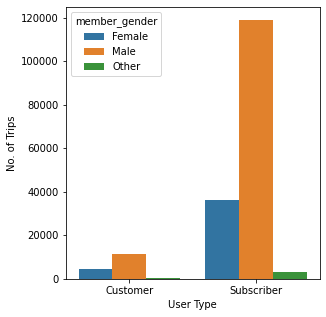

In [86]:
plt.figure(figsize = [10, 5])

#Plot Bar graphs consisting genders
plt.subplot(1, 2, 1)

g = sns.countplot(data=df_clean, x="user_type", hue="member_gender")
g.set_xlabel('User Type')
g.set_ylabel('No. of Trips');

Males utilise this service more when compared to other genders.

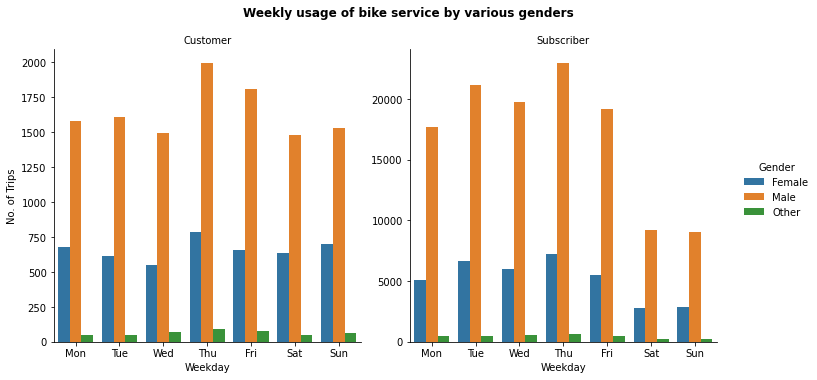

In [90]:
# Weekly usage of bike service by various genders
g = sns.catplot(data=df_clean, x='start_week', col="user_type", hue='member_gender', kind='count', sharey = False,
                order = weekday)
g.set_axis_labels("Weekday", "No. of Trips")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('Weekly usage of bike service by various genders ', y=1.05, fontweight='bold');

As in the previous section, the trend is very similar for males and females: customers use the system more often during weekends than within a week (although the jump in bike used on weekends is much higher for females than for males); subscribers use the system mainly within a week.

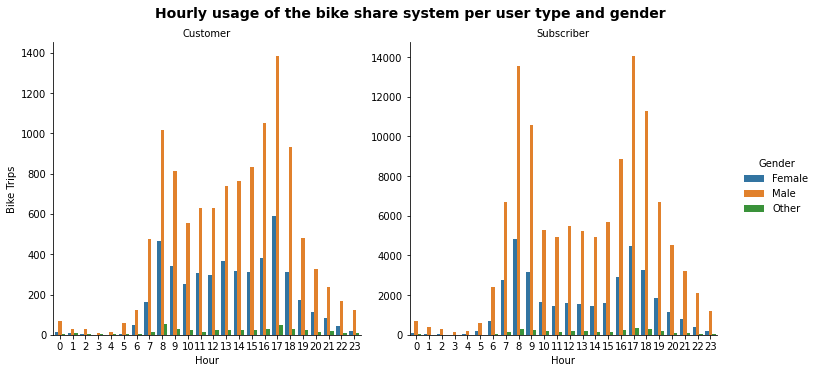

In [101]:
# Hourly usage of the bike sharing system per user type and gender
g = sns.catplot(data=df_clean, x='start_hour', col="user_type", hue='member_gender', kind='count', sharey = False)
g.set_axis_labels("Hour", "Bike Trips")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('Hourly usage of the bike share system per user type and gender', y=1.03, fontsize=14, fontweight='semibold');

During the day, both males and females use the system the same way: customers use bikes mainly between 8 am - 7 pm; subscribers on the other side use the system at around 8-9am and 5-6pm when they go and come back from work.

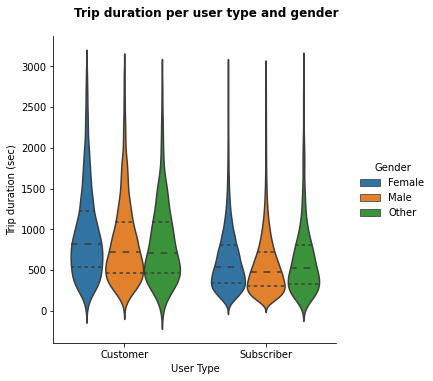

In [103]:
# Violin plot

g = sns.catplot(data=data, x='user_type', y="duration_sec", hue="member_gender", kind="violin",inner='quartile')

g.set_axis_labels("User Type", "Trip duration (sec)")
g._legend.set_title('Gender')
g.fig.suptitle('Trip duration per user type and gender', y=1.05,fontweight='bold');

Here we can observe that in both cases, females take longer trips (measured in time) than males and other. The difference is more visible for customers (~13 min for males and other vs ~15 for females) than for subscribers (the difference is quite small).

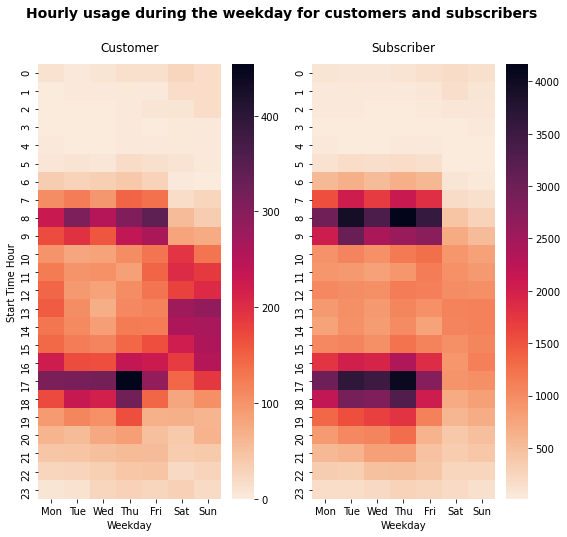

In [115]:
# Week order
df_clean['start_week'] = pd.Categorical(df_clean['start_week'], 
                                                categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                                ordered=True)
plt.figure(figsize=(9,8))
plt.suptitle('Hourly usage during the weekday for customers and subscribers', fontsize=14, fontweight='semibold')
# Heat Map for customers
plt.subplot(1, 2, 1)
df_customer = df_clean.query('user_type == "Customer"').groupby(["start_hour", "start_week"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("start_hour", "start_week", "bike_id")
sns.heatmap(df_customer, cmap="rocket_r")
plt.title("Customer", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('Start Time Hour')
# HeatMap for subscribers
plt.subplot(1, 2, 2)
df_subscriber = df_clean.query('user_type == "Subscriber"').groupby(["start_hour", "start_week"])["bike_id"].size().reset_index()
df_subscriber = df_subscriber.pivot("start_hour", "start_week", "bike_id")
sns.heatmap(df_subscriber, cmap="rocket_r")
plt.title("Subscriber", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('');

**Customer:** <br>
The heatmap shows that Cutomer uses the service all the days randomly and would travel any time in the day from 8am - 6pm.

**Subscribers:** <br>
They use the bike sharing service regularly during weekdays and less during weekends.The starting time is highly shaded near 8-9am and end time at around 5-6pm.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
The multivariate exploration helped in discovering new analysis when compared to the previous bivariate exploration as well as univariate exploration, the relationship between the multiple variables plotted are visualized altogether and information are presented combined. Subscribers utilise the service mainly in weekdays and more often at two partivular time intevals which would have been because of the wirk timings. Whereas customers, they are not much in number when compared to subscribers and they utilise this service when required and would travel for a high trip duration when compared to subscribers.

### Were there any interesting or surprising interactions between features?
There was a regular trend in the timings in various analysis but one of them in gender specification , it was observed that female have taken longer trips on an average when compared  to men.